In [1]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [79]:
x = sp.Symbol('x')
t = sp.Symbol('t')

In [58]:
a, b = 1, 2
a_a, b_b = 3.5, -4
k1, k2, k3 = 60, 1, 25
x0, c = ua + (ub - ua) / 2, 100

h = (ub - ua) / 150
def phi(x, x0, c):
    if abs(x - x0) - h / 2 < 1e-5:
        return c / 2
    elif 2*x - h < 2*x0 < 2*x + h:
        return c
    else:
        return 0
    
k = sp.Piecewise(
    (k1, x < ua + (ub - ua) / 3),
    (k3, ua + 2 * (ub - ua) / 3 <= x),
    (k2, True),
)
    
source = [(100, ua + (ub - ua) / 2)]

In [59]:
def second_task(a, b, a_a, b_b, h, phi, k_expr, sources):
    l, r = sp.symbols('l r')
    tmp = sp.lambdify((l, r), h * (sp.integrate(1/k_expr, (x, l, r)))**(-1))
    n = int((b - a) / h) + 1
    
    matrix = np.zeros(shape=(n, n))
    t = np.zeros(shape=(n, 1))
    xs = np.linspace(a, b, n)
    matrix[0,0] = matrix[-1, -1] = 1
    t[0] = a_a
    t[-1] = b_b
    
    for i in range(1, n -1):
        matrix[i,i-1] = tmp(xs[i-1], xs[i])
        matrix[i, i] = -tmp(xs[i-1], xs[i]) - tmp(xs[i], xs[i+1])
        matrix[i, i+1] =  tmp(xs[i], xs[i+1])
        t[i] = -h * sum(phi(xs[i], x0i, ci) for ci, x0i in sources)
        
    return xs, np.linalg.solve(matrix, t)

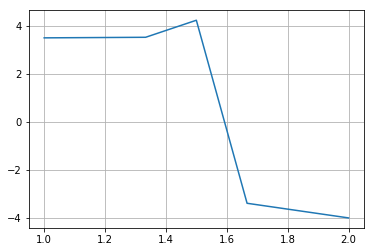

In [60]:
x2, y2 = second_task(a, b, a_a, b_b, h, phi, k, source)

plt.plot(x2, y2)
plt.grid()
plt.show()

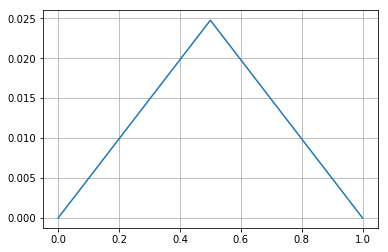

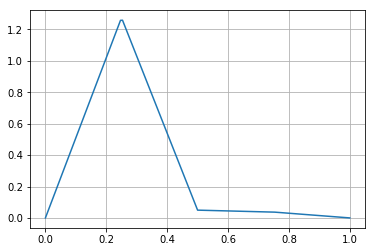

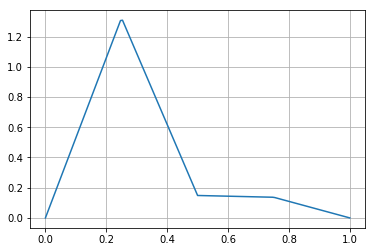

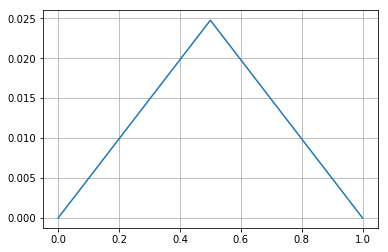

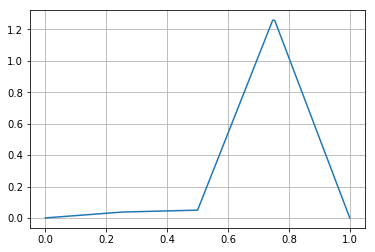

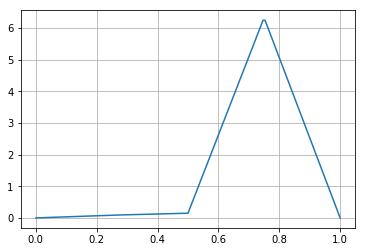

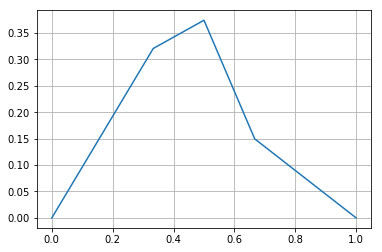

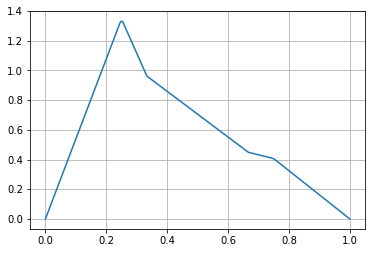

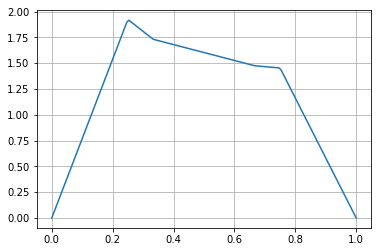

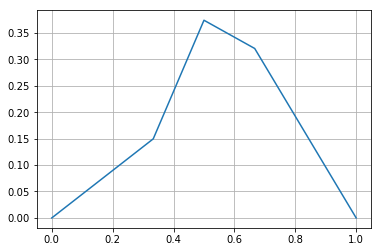

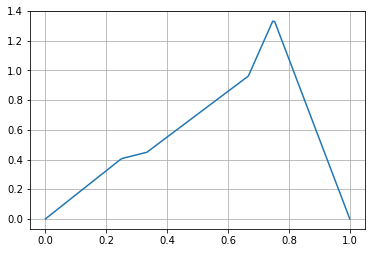

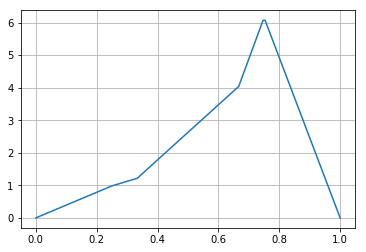

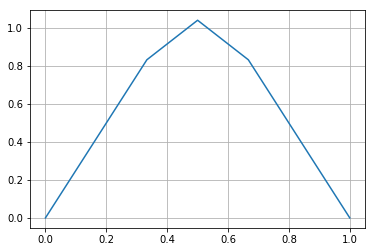

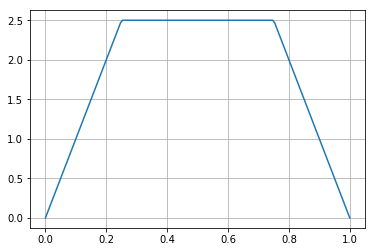

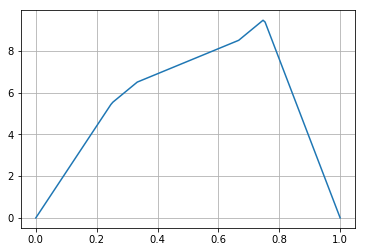

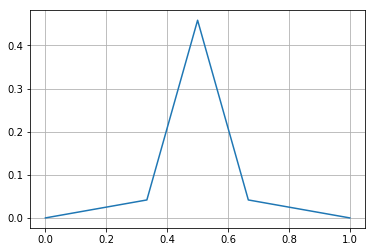

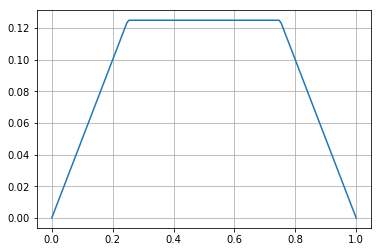

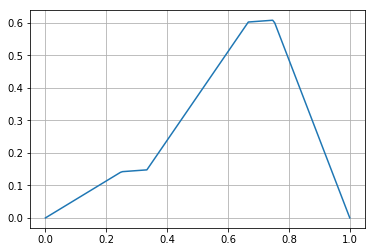

In [62]:
a, b = 0, 1
a_a, b_b = 0, 0
x0, c = a + (b - a) / 2, 100
h = (b - a) / 150

sources = [
    [(10, a + (b - a) / 2)],
    [(10, a + (b - a) / 4), (10, a + 3 * (b - a) / 4)],
    [(10, a + (b - a) / 4), (50, a + 3 * (b - a) / 4)],
]

for k1, k2 in [[1, 100], [100, 1]]:
    k = sp.Piecewise(
        (k1, x < a + (b - a) / 2),
        (k2, True),
    )
    for source in sources:
        xs, ys = second_task(a, b, a_a, b_b, h, phi, k, source)
        plt.plot(xs, ys)
        plt.grid()
        plt.show()
    
for k1, k2, k3 in [[1, 3, 9],[9, 3, 1],[1, 2, 1],[20, 1, 20]]:
    k = sp.Piecewise(
        (k1, x < a + (b - a) / 3),
        (k3, a + 2 * (b - a) / 3 <= x),
        (k2, True),
    )
    for source in sources:
        xs, ys = second_task(a, b, a_a, b_b, h, phi, k, source)
        plt.plot(xs, ys)
        plt.grid()
        plt.show()

In [63]:
def third_task(x_h, t_h, a, b, k, T, g1, g2, phi, f):
    step_x = int((b - a) / x_h) + 1
    step_t = int(T / t_h) + 1
    x_hs = np.linspace(a, b, step_x)
    t_hs = np.linspace(0, T, step_t)
    
    matrix = np.zeros(shape=(step_t, step_x))
    
    matrix[0, 1:-1] = np.array([phi(x_hs[i]) for i in range(1, step_x-1)])
    
    matrix[:, 0] = np.array([g1(x_hs[0], t_hs[i]) for i in range(step_t)])
    matrix[:, -1] = np.array([g2(x_hs[-1], t_hs[i]) for i in range(step_t)])
    
    for i in range(1, step_t):
        for j in range(1, step_x-1):
            matrix[i,j] = sum([
                k(x_hs[j] - x_h/2) * t_h / x_h**2 * matrix[i-1, j-1],
                (1 - (k(x_hs[j] - x_h / 2) + k(x_hs[j] + x_h / 2)) * t_h / x_h**2) * matrix[i-1, j],
                k(x_hs[j] + x_h/2) * t_h / x_h**2 * matrix[i-1, j+1],
                t_h * f(x_hs[j], t_hs[i]) * (1 - math.exp(-t_hs[i]))
            ])

    for i in range(0, step_t, 100):
        plt.plot(x_hs, matrix[i,:])
        plt.grid()
    plt.show()

In [75]:
a, b = 1.5, 2.5
g1 = sp.lambdify((x, t), 3)
g2 = sp.lambdify((x, t), 3)
f = sp.lambdify((x, t), x + x**0.5)
k = sp.lambdify(x, x**(-1/3))
phi = sp.lambdify(x, 12*(x-2)**2)
x = 0.05
t = 0.001
T = 500 * t

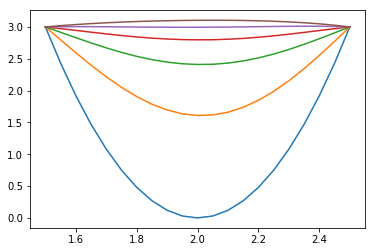

In [76]:
third_task(x, t, a, b, k, T, g1, g2, phi, f)

In [77]:
def fourth_task(a, b, k, T, phi, g1, g2, f):
    x_h = (b - a) / 50
    step_x = int((b - a) / x_h) + 1
    t_h = 0.5 * x_h**2 / k
    step_t = int(T / t_h) + 1
    x_hs = np.linspace(a, b, step_x)
    t_hs = np.linspace(0, T, step_t)
    
    matrix = np.zeros(shape=(step_t, step_x))
    
    matrix[0, 1:-1] = np.array([phi(x_hs[i], t_hs[0]) for i in range(1, step_x-1)])
    
    matrix[:, 0] = np.array([g1(x_hs[0], t_hs[i]) for i in range(step_t)])
    matrix[:, -1] = np.array([g2(x_hs[-1], t_hs[i]) for i in range(step_t)])
    
    coef = np.array([k * t_h / x_h**2, 1 - 2 * k * t_h / x_h**2, k * t_h / x_h**2])
    
    for i in range(1, step_t):
        for j in range(1, step_x-1):
            matrix[i][j] = matrix[i-1, j-1:j+2].dot(coef) + t_h * f(x_hs[j], t_hs[i-1])
            
    for i in range(1, step_t):
        for j in range(1, step_x-1):
            matrix[i,j] = sum([
                k * t_h / x_h**2 * matrix[i-1, j-1],
                (1 - 2 * k * t_h / x_h**2) * matrix[i-1, j],
                k * t_h / x_h**2 * matrix[i-1, j+1],
                t_h * f(x_hs[j], t_hs[i - 1])
            ])
    
    for i in range(0, step_t, 100):
        plt.plot(x_hs, matrix[i,:])
        plt.grid()
    plt.show()

In [80]:
phi = sp.lambdify((x, t), 0)
g1 = sp.lambdify((x, t), 0)
g2 = sp.lambdify((x, t), 0)
k = 1
T = 0.5
a, b = 0, 1
f = sp.lambdify((x, t), x)

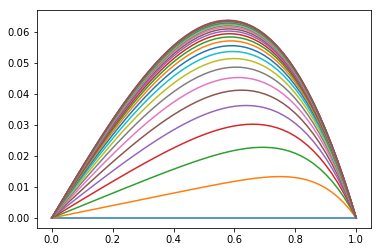

In [81]:
fourth_task(a, b, k, T, phi, g1, g2 , f)